In [7]:
import pymysql

connector = pymysql.connect(user='dev', password='ax2',host='127.0.0.1',port=3307,db='pythonexam')
cursor = connector.cursor()

query1 = ('SELECT country, total_cases from corona20200515 where country= %s UNION select country, Total_cases from corona20200518 where country=%s UNION select country, Total_cases from corona20200522 where country=%s')
table_country = "USA", "USA", "USA"
cursor.execute(query1, table_country)
corona_overtime = []
country1 = []
for country, cases in cursor:
    country1.append(country)
    cases = cases.replace(',','')
    cases_int = int(cases)
    corona_overtime.append(cases_int)
    print(corona_overtime)

query2 = ('SELECT TABLE_NAME FROM INFORMATION_SCHEMA.TABLES WHERE table_schema = %s')

cursor.execute(query2, connector.db)
table_name = []
for name in cursor:
    names = list(name)
    for n in names:
        table_name.append(n)
        #print(type(table_name[0]))
        #print(table_name)
    
cursor.close()
connector.close()

[1457649]
[1457649, 1528179]
[1457649, 1528179, 1621333]


In [8]:
import pandas as pd

df = pd.DataFrame({'USA': corona_overtime},table_name)
df

,USA
corona20200515,1457649
corona20200518,1528179
corona20200522,1621333


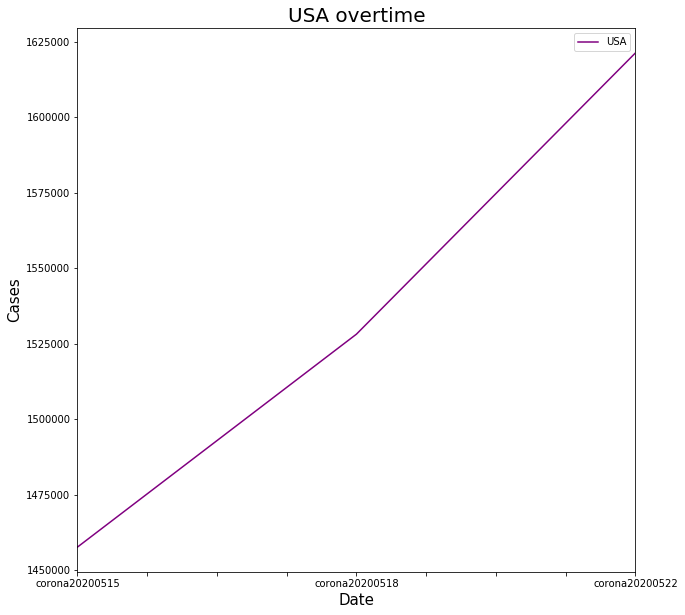

In [9]:
import matplotlib.pyplot as plt

df.plot(figsize=(10,10), color='purple')

plt.title("USA overtime", fontsize=20)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Cases",fontsize=15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
#add this to xticks if to many to see, rotation=90

plt.show()
